In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

## This is a dataset of electric vehicles.

Some basic tasks would include

* Which car has the fastest 0-100 acceleration?
* Which has the highest efficiency?
* Does a difference in power train effect the range, top speed, efficiency?
* Which manufacturer has the most number of vehicles?
* How does price relate to rapid charging?


In [76]:
df = pd.read_csv("EV/ElectricCarData_Clean.csv")

df.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [77]:
# Take a look on the features this dataset holds 

df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

# Quality Assesment 

In [78]:
# Data Completence

# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Print the missing values count and percentage for each column
print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values Percentage:
Brand              0.0
Model              0.0
AccelSec           0.0
TopSpeed_KmH       0.0
Range_Km           0.0
Efficiency_WhKm    0.0
FastCharge_KmH     0.0
RapidCharge        0.0
PowerTrain         0.0
PlugType           0.0
BodyStyle          0.0
Segment            0.0
Seats              0.0
PriceEuro          0.0
dtype: float64


In [79]:
# Check data conformity 

# Check for duplicate rows
duplicate_rows = df.duplicated()
duplicate_rows_count = duplicate_rows.sum()

# Check for inconsistent values within columns
inconsistent_values = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) > 1:
        inconsistent_values.append(column)

# Print the results
print("Duplicate Rows Count:", duplicate_rows_count)
print("Inconsistent Columns:", inconsistent_values)

Duplicate Rows Count: 0
Inconsistent Columns: ['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']


In [80]:
for column in df.columns:
    dtype = df[column].dtype
    unique_values = df[column].unique()
    print(f"The ({column}) column holding data of type ({dtype}) \n and has values of ({unique_values})")


The (Brand) column holding data of type (object) 
 and has values of (['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat '])
The (Model) column holding data of type (object) 
 and has values of (['Model 3 Long Range Dual Motor' 'ID.3 Pure' '2' 'iX3 ' 'e ' 'Air '
 'e-Golf ' 'e-208 ' 'Model 3 Standard Range Plus' 'Q4 e-tron '
 'EQC 400 4MATIC' 'Leaf ' 'Kona Electric 64 kWh' 'i4 ' 'IONIQ Electric'
 'ID.3 Pro S' 'Taycan Turbo S' 'e-Up! ' 'ZS EV' 'Cooper SE ' 'Corsa-e '
 'Model Y Long Range Dual Motor' 'Enyaq iV 50' 'e-tron GT '
 'Model 3 Long Range Performance' 'ID.4 ' 'ID.3 Pro'
 'XC40 P8 AWD Recharge' 'i3 120 Ah' 'e-2008 SUV ' 'e-tron 50 quattro'
 'e-Niro 64 kWh' 'Zoe ZE50 R110' 'Cybertruck Tri Motor' 'MX-30 ' 'Leaf e+'
 'UX 300e' '

### Observation 

We checked the Completence,Conformity,integrity and accuracy of the data.

The data is very good quality wise and ready for analysis


# Analysis and answering questions 

Now that we have the data ready we can start answering the questions we need from the dataset

## #1 What is the fastest acceleration from 0-100 

In [81]:

# Initialize variable to store fastest acceleration 
fastest_acceleration = float(0)

# Initialize variable to store fastest car name
fastest_brand=''
fastest_model= ''

index=0

for accele in df['AccelSec']:
        if accele and float(accele) > fastest_acceleration:
            fastest_acceleration = float(accele)
            car_model = df['Model'][index]
            car_brand = df['Brand'][index]
        index+=1    

print(f"fastest car {car_brand, car_model} it's acceleration {fastest_acceleration}")            

fastest car ('Renault ', 'Kangoo Maxi ZE 33') it's acceleration 22.4


## # 2 Which has the highest efficiency?

In [82]:

highest_efficiency = 0
car_model = ""
car_brand=" "


index=0
for car in df.index:
    efficiency_whkm = df['Efficiency_WhKm'][car]
    if efficiency_whkm and float(efficiency_whkm) > highest_efficiency:
        highest_efficiency = float(efficiency_whkm)
        car_model = df['Model'][car]
        car_brand= df['Brand'][car]
       


print("The car with the highest efficiency is:",car_brand, car_model,"with efficiency of :", highest_efficiency ,"Wh/km")        

The car with the highest efficiency is: Mercedes  EQV 300 Long with efficiency of : 273.0 Wh/km


## #3  Does a difference in power train effect the range, top speed, efficiency?

In [83]:

# First let's look at the power train values 
df['PowerTrain'].unique()

array(['AWD', 'RWD', 'FWD'], dtype=object)

### so there are three types of powerTrain (`AWD`-`RWD`-`FWD`)

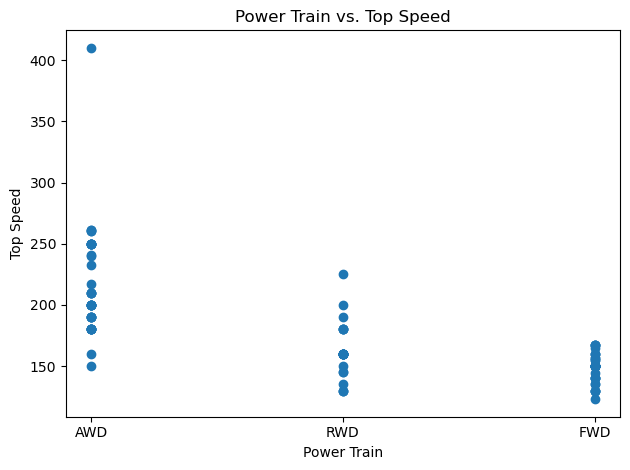

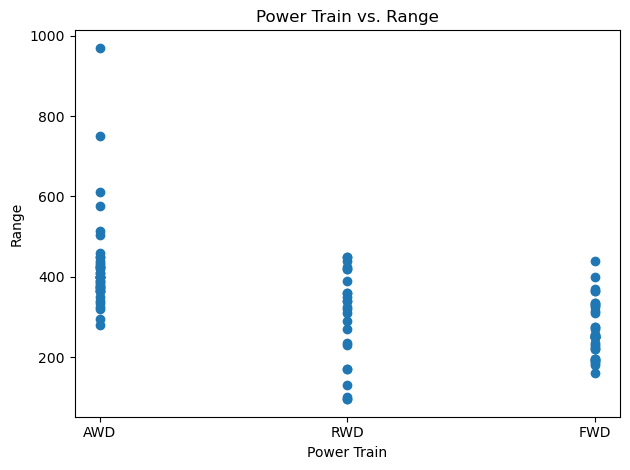

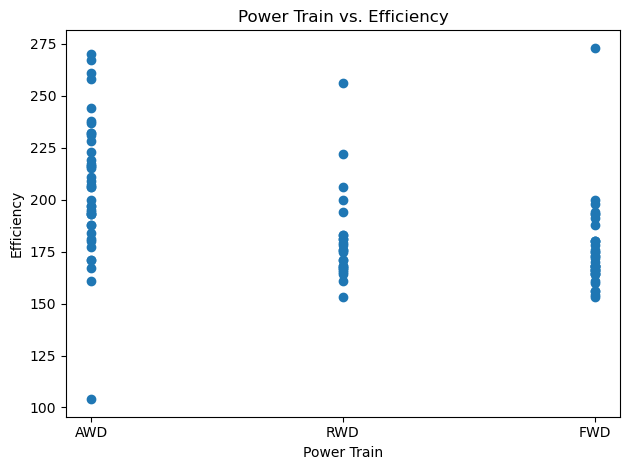

In [84]:
# Create a scatter plot

plt.scatter(df['PowerTrain'], df['TopSpeed_KmH'])

# Add labels and title
plt.xlabel("Power Train")
plt.ylabel("Top Speed")
plt.title("Power Train vs. Top Speed")

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()


# Create a scatter plot
plt.scatter(df['PowerTrain'], df['Range_Km'])

# Add labels and title
plt.xlabel("Power Train")
plt.ylabel("Range")
plt.title("Power Train vs. Range")

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()



# Create a scatter plot
plt.scatter(df['PowerTrain'], df['Efficiency_WhKm'])
 
 
# Add labels and title
plt.xlabel("Power Train")
plt.ylabel("Efficiency")
plt.title("Power Train vs. Efficiency")


# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

In [85]:
# We can calculate the mean average of each to compare as well

awd_speed_sum= df[df['PowerTrain']=="AWD"]['TopSpeed_KmH'].sum()
rwd_speed_sum= df[df['PowerTrain']=="RWD"]['TopSpeed_KmH'].sum()
fwd_speed_sum= df[df['PowerTrain']=="FWD"]['TopSpeed_KmH'].sum()

awd_speed_count= df[df['PowerTrain']=="AWD"]['TopSpeed_KmH'].count()
rwd_speed_count= df[df['PowerTrain']=="RWD"]['TopSpeed_KmH'].count()
fwd_speed_count= df[df['PowerTrain']=="FWD"]['TopSpeed_KmH'].count()


avg_speed_awd= awd_speed_sum/awd_speed_count
avg_speed_rwd= rwd_speed_sum/rwd_speed_count
avg_speed_fwd= fwd_speed_sum/fwd_speed_count

print(f"Average top speed on AWD is : {avg_speed_awd} \n Average top speed on RWD is : {avg_speed_rwd} \n Average top speed on FWD is : {avg_speed_fwd} \n")

Average top speed on AWD is : 216.90243902439025 
 Average top speed on RWD is : 162.4 
 Average top speed on FWD is : 148.75675675675674 



### Observation 

The difference in power train affects the top speed of the car

In [86]:
# now let's see if it affects Range the car can travel in a full charge

awd_range_sum= df[df['PowerTrain']=="AWD"]['Range_Km'].sum()
rwd_range_sum= df[df['PowerTrain']=="RWD"]['Range_Km'].sum()
fwd_range_sum= df[df['PowerTrain']=="FWD"]['Range_Km'].sum()

awd_range_count= df[df['PowerTrain']=="AWD"]['Range_Km'].count()
rwd_range_count= df[df['PowerTrain']=="RWD"]['Range_Km'].count()
fwd_range_count= df[df['PowerTrain']=="FWD"]['Range_Km'].count()


avg_range_awd= awd_range_sum/awd_range_count
avg_range_rwd= rwd_range_sum/rwd_range_count
avg_range_fwd= fwd_range_sum/fwd_range_count

print(f"Average range on AWD is : {avg_range_awd} \n Average range on RWD is : {avg_range_rwd} \n Average range on FWD is : {avg_range_fwd} \n")

Average range on AWD is : 426.4634146341463 
 Average range on RWD is : 299.4 
 Average range on FWD is : 268.2432432432432 



### Observation 

The AWD power train is very different and distinct from the RWD and FWD range wise, while RWD and FWD are very close 

In [87]:
# now let's see if it affects Effeciency of the car

awd_eff_sum= df[df['PowerTrain']=="AWD"]['Efficiency_WhKm'].sum()
rwd_eff_sum= df[df['PowerTrain']=="RWD"]['Efficiency_WhKm'].sum()
fwd_eff_sum= df[df['PowerTrain']=="FWD"]['Efficiency_WhKm'].sum()

awd_eff_count= df[df['PowerTrain']=="AWD"]['Efficiency_WhKm'].count()
rwd_eff_count= df[df['PowerTrain']=="RWD"]['Efficiency_WhKm'].count()
fwd_eff_count= df[df['PowerTrain']=="FWD"]['Efficiency_WhKm'].count()


avg_eff_awd= awd_eff_sum/awd_eff_count
avg_eff_rwd= rwd_eff_sum/rwd_eff_count
avg_eff_fwd= fwd_eff_sum/fwd_eff_count

print(f"Average Effeciency on AWD is : {avg_eff_awd} \n Average Effeciency on RWD is : {avg_eff_rwd} \n Average Effeciency on FWD is : {avg_eff_fwd} \n")

Average Effeciency on AWD is : 206.7560975609756 
 Average Effeciency on RWD is : 180.44 
 Average Effeciency on FWD is : 175.56756756756758 



### Observation 

We see once more that AWD power train is a bit different and distinct from the RWD and FWD , while RWD and FWD are very close 

## #4 Which manufacturer has the most number of vehicles?

In [88]:
brands=df['Brand'].unique()
brands[6]

'Peugeot '

In [89]:
sum=df[df['Brand']==brands[6]].__len__()
sum

2

In [90]:
# We can use a for loop to find the answer 

most_cars=0
highest_brand=''

for brand in df['Brand'].unique():
    sum = df[df['Brand']==brand].__len__()
    if sum > most_cars:
        most_cars=sum
        highest_brand=brand
        
print(f"The manufacturer with the most number of vehicles is : {highest_brand} with {most_cars} cars out of {df.__len__()} from {df['Brand'].unique().__len__()} manufacturer")        

The manufacturer with the most number of vehicles is : Tesla  with 13 cars out of 103 from 33 manufacturer


## #5 How does price relate to rapid charging?

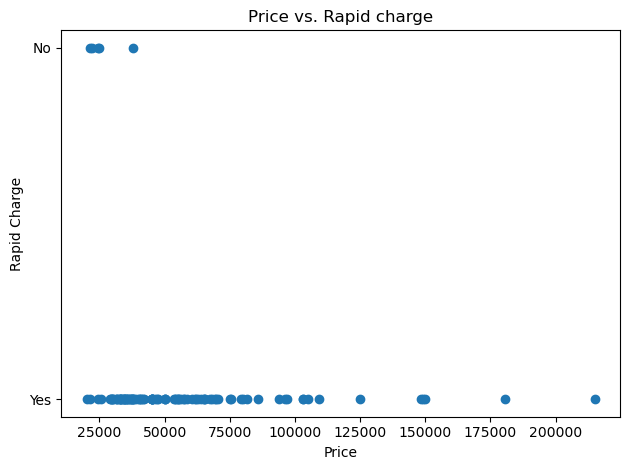

In [91]:
plt.scatter(df['PriceEuro'],df['RapidCharge'])

# Add labels and title
plt.xlabel("Price")
plt.ylabel("Rapid Charge")
plt.title("Price vs. Rapid charge")

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

In [92]:
no_rapid_charge= df[df['RapidCharge']=="No"]

no_prices= no_rapid_charge['PriceEuro']

In [93]:
yes_rapid_charge = df[df['RapidCharge']=="Yes"]

yes_prices= yes_rapid_charge['PriceEuro']

In [94]:
no_prices.min()

21387

In [95]:
yes_prices.min()

20129

## Observation 

The price is not certainly a factor for the car to have a rapid charge or not, `BUT` of course it also depends on many factors such as *brand*, *Effeciency*,*Powertrain* etc..

--------------------------

# Price Predictions 

### First, we'll try to find collerations between features and prices to scope down important features 

### Preprocess data

In [96]:
# Step 1: Create a mapping of unique string values to integers
unique_categories = df['Segment'].unique()
category_to_int = {category: i for i, category in enumerate(unique_categories)}

# Step 2: Use the map() function to replace the strings with integers
df['Segment'] = df['Segment'].map(category_to_int)

print(df)

           Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0  

Correlation between Segment and PriceEuro: 0.30728014263346937


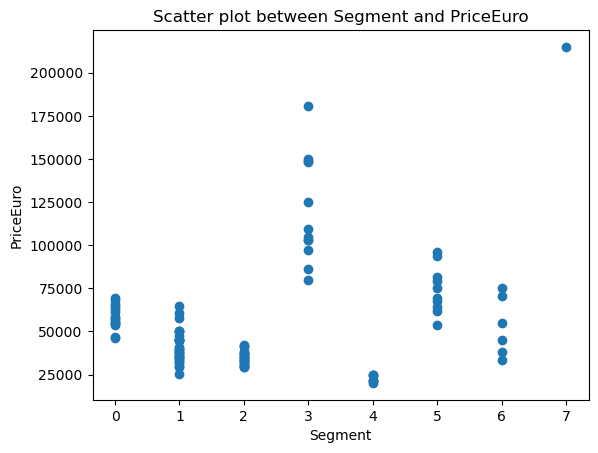

In [97]:
column1='Segment'
column2='PriceEuro'


# Step 4: Calculate Correlation Coefficient
correlation_coefficient = df[column1].corr(df[column2])

# Step 5: Interpret the Correlation
print(f"Correlation between {column1} and {column2}: {correlation_coefficient}")

# Optional: If you want to visualize the correlation, you can create a scatter plot
import matplotlib.pyplot as plt

plt.scatter(df[column1], df[column2])
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f"Scatter plot between {column1} and {column2}")
plt.show()

In [98]:
# First we preprocess data

# FastCharge was stored as string converting them to integers

df['FastCharge_KmH']=df['FastCharge_KmH'].replace('-',0)
df['FastCharge_KmH']=df['FastCharge_KmH'].astype(int)

C:\Users\amedhatf\AppData\Local\Temp\ipykernel_15860\72146593.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


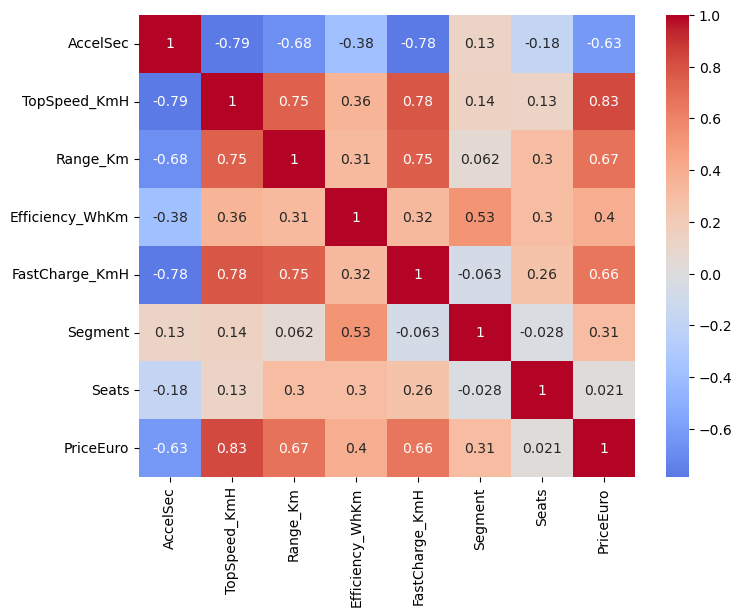

In [99]:
import seaborn as sns
# Heatmap is very effecient in finding collerations between features

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', center=0)

# Filter out only the positively correlated values
positive_correlations = correlation_matrix[correlation_matrix > 0]


plt.show()

### Observation 

The Price of the car is positively corellated with the TopSpeed,Range_km and FastCharge, Therfore we can use those two features to predict prices

In [65]:
data_needed= df[['TopSpeed_KmH','Range_Km','FastCharge_KmH','PriceEuro']]

In [66]:
data_needed

,TopSpeed_KmH,Range_Km,FastCharge_KmH,PriceEuro
0,233,450,940,55480
1,160,270,250,30000
2,210,400,620,56440
3,180,360,560,68040
4,145,170,190,32997
...,...,...,...,...
98,160,330,440,45000
99,210,335,540,96050
100,200,325,440,50000
101,200,375,450,65000


In [56]:
# identifying features and target

X = df[['TopSpeed_KmH','Range_Km','FastCharge_KmH']]

y= df['PriceEuro']

### Issue #1 

Data sample is very small 

`Solution` Data augmentation

In [78]:
# Data augmentation function using random noise for both features and target
def augment_data(data_features,data_target, noise_level=0.1, num_samples=10):
    augmented_data = []

    for i in range(num_samples):
        # Augment the features with random noise
        augmented_features = data_features[['TopSpeed_KmH','Range_Km','FastCharge_KmH']] + np.random.normal(scale=noise_level, size=data_features.shape)

        # Augment the target variable with random noise (optional)
        augmented_target = data_target + np.random.normal(scale=noise_level, size=len(data_target))

        # Combine augmented features and target into a single DataFrame
        augmented_sample = pd.DataFrame({
            'TopSpeed_KmH': augmented_features[:, 0],
            'Range_Km': augmented_features[:, 1],
            'FastCharge_KmH': augmented_features[:, 2],
            'PriceEuro': augmented_target
        })

        augmented_data.append(augmented_sample)

    return pd.concat(augmented_data, ignore_index=True)

# Augment the entire dataset
augmented_data = augment_data(X,y, noise_level=0.1, num_samples=10)

print(augmented_data)

InvalidIndexError: (slice(None, None, None), 0)

In [77]:
y

0      55480
1      30000
2      56440
3      68040
4      32997
       ...  
98     45000
99     96050
100    50000
101    65000
102    62000
Name: PriceEuro, Length: 103, dtype: int64

In [64]:
augmented_data.__len__()

y.__len__()

103

In [103]:
y.describe()

count       103.000000
mean      55811.563107
std       34134.665280
min       20129.000000
25%       34429.500000
50%       45000.000000
75%       65000.000000
max      215000.000000
Name: PriceEuro, dtype: float64

In [104]:
y.shape

(103,)

In [105]:
data_needed=df[['TopSpeed_KmH','Range_Km','FastCharge_KmH','PriceEuro']]

In [106]:
# Define a function for adding random noise to the numerical features
def add_random_noise(value, noise_range):
    return value + np.random.uniform(noise_range[0], noise_range[1])

# Data augmentation with random noise
def data_augmentation_with_noise(dataset, noise_range=(-5, 5)):
    augmented_data = []
    for _, row in dataset.iterrows():
        augmented_row = {
            'TopSpeed_KmH': add_random_noise(row['TopSpeed_KmH'], noise_range),
            'Range_Km': add_random_noise(row['Range_Km'], noise_range),
            'FastCharge_KmH': add_random_noise(row['FastCharge_KmH'], noise_range),
            'PriceEuro': row['PriceEuro'],  # Keep the target variable unchanged
        }
        augmented_data.append(augmented_row)

    augmented_dataset = pd.DataFrame(augmented_data)
    return augmented_dataset

# Applying data augmentation with random noise
augmented_dataset = data_augmentation_with_noise(data_needed, noise_range=(-5, 5))
print(augmented_dataset)

     TopSpeed_KmH    Range_Km  FastCharge_KmH  PriceEuro
0      237.180629  451.493968      938.613058      55480
1      159.489261  268.493495      248.184320      30000
2      205.377629  397.855733      619.698484      56440
3      178.363359  355.666003      560.315174      68040
4      143.560726  166.063291      190.809444      32997
..            ...         ...             ...        ...
98     158.012290  327.616512      442.310383      45000
99     212.006850  332.762997      541.987676      96050
100    200.658618  328.209565      440.452015      50000
101    204.489678  373.156585      448.958769      65000
102    189.396973  395.975116      475.871803      62000

[103 rows x 4 columns]
